# library import

In [1]:
import os, random
import json
import warnings 
warnings.filterwarnings('ignore')


import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pycocotools.coco import COCO

In [2]:
# seed 고정
random_seed = 21
np.random.seed(random_seed)
random.seed(random_seed)

In [3]:
dataset_path = './input/data'
anns_file_path = dataset_path + '/' + 'train_all.json'

# Read annotations
with open(anns_file_path, 'r') as f:
    dataset = json.loads(f.read())

In [4]:
categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']

In [5]:
print('Number of categories:', len(categories))
print('Number of annotations:', len(anns))
print('Number of images:', len(imgs))

Number of categories: 11
Number of annotations: 26400
Number of images: 3272


In [6]:
nr_cats = len(categories)
cat_names = []
for cat_it in categories:
    cat_names.append(cat_it['name'])

cat_histogram = np.zeros(nr_cats,dtype=int)
cat_area_histogram = np.zeros(nr_cats,dtype=int)

for ann in anns:
    cat_histogram[ann['category_id']] += 1
    cat_area_histogram[ann['category_id']] += ann['area']


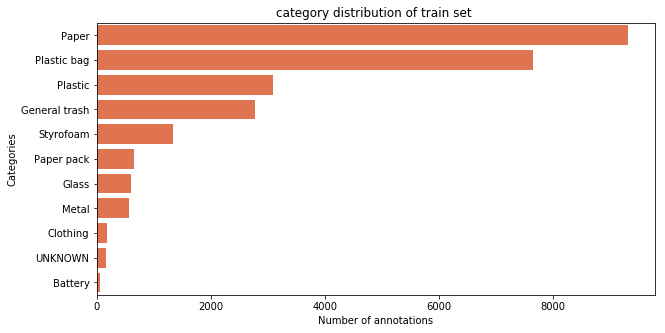

In [7]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10,5))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Number of annotations': cat_histogram})
df = df.sort_values('Number of annotations', 0, False)

# Plot the histogram
plt.title("category distribution of train set ")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df, label="Total", color="#F86738")

In [8]:
# category labeling 
sorted_temp_df = df.sort_index()

# background = 0 에 해당되는 label 추가 후 기존들을 모두 label + 1 로 설정
sorted_df = pd.DataFrame(["Backgroud"], columns = ["Categories"])
sorted_df = sorted_df.append(sorted_temp_df, ignore_index=True)

In [9]:
category_names = list(sorted_df.Categories)

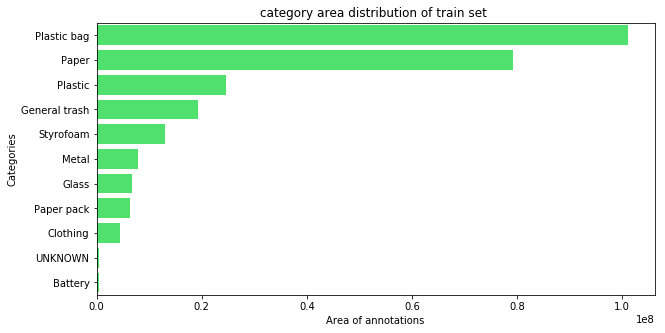

In [10]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10,5))

# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Area of annotations': cat_area_histogram})
df = df.sort_values('Area of annotations', 0, False)

# Plot the histogram
plt.title("category area distribution of train set ")
plot_1 = sns.barplot(x="Area of annotations", y="Categories", data=df, label="Total", color="#38F85E")

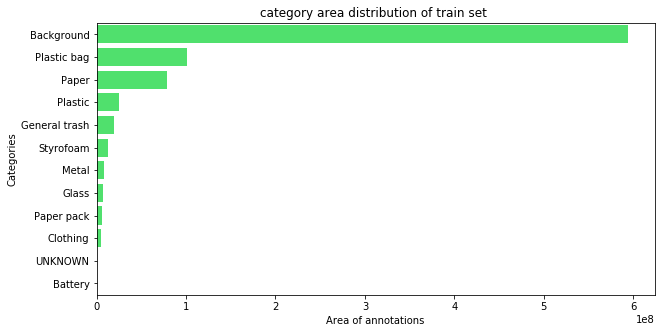

In [11]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10,5))

cat_names.append('Background')
cat_area_histogram = np.append(cat_area_histogram,np.array([594043572]))
# Convert to DataFrame
df = pd.DataFrame({'Categories': cat_names, 'Area of annotations': cat_area_histogram})
df = df.sort_values('Area of annotations', 0, False)

# Plot the histogram
plt.title("category area distribution of train set ")
plot_1 = sns.barplot(x="Area of annotations", y="Categories", data=df, label="Total", color="#38F85E")

In [12]:
train_path = dataset_path + '/train_all.json'

In [13]:
coco = COCO(train_path)

loading annotations into memory...
Done (t=5.52s)
creating index...
index created!


In [14]:
image_id = coco.getImgIds(imgIds=1986)
image_id

[1986]

In [15]:
image_infos = coco.loadImgs(image_id)[0]
image_infos

{'license': 0,
 'url': None,
 'file_name': 'batch_02_vt/1338.jpg',
 'height': 512,
 'width': 512,
 'date_captured': None,
 'id': 1986}

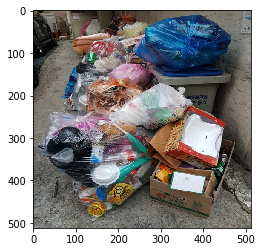

In [16]:
images = cv2.imread(os.path.join(dataset_path, image_infos['file_name']))
images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB).astype(np.float32)
images /= 255.0
plt.imshow(images)

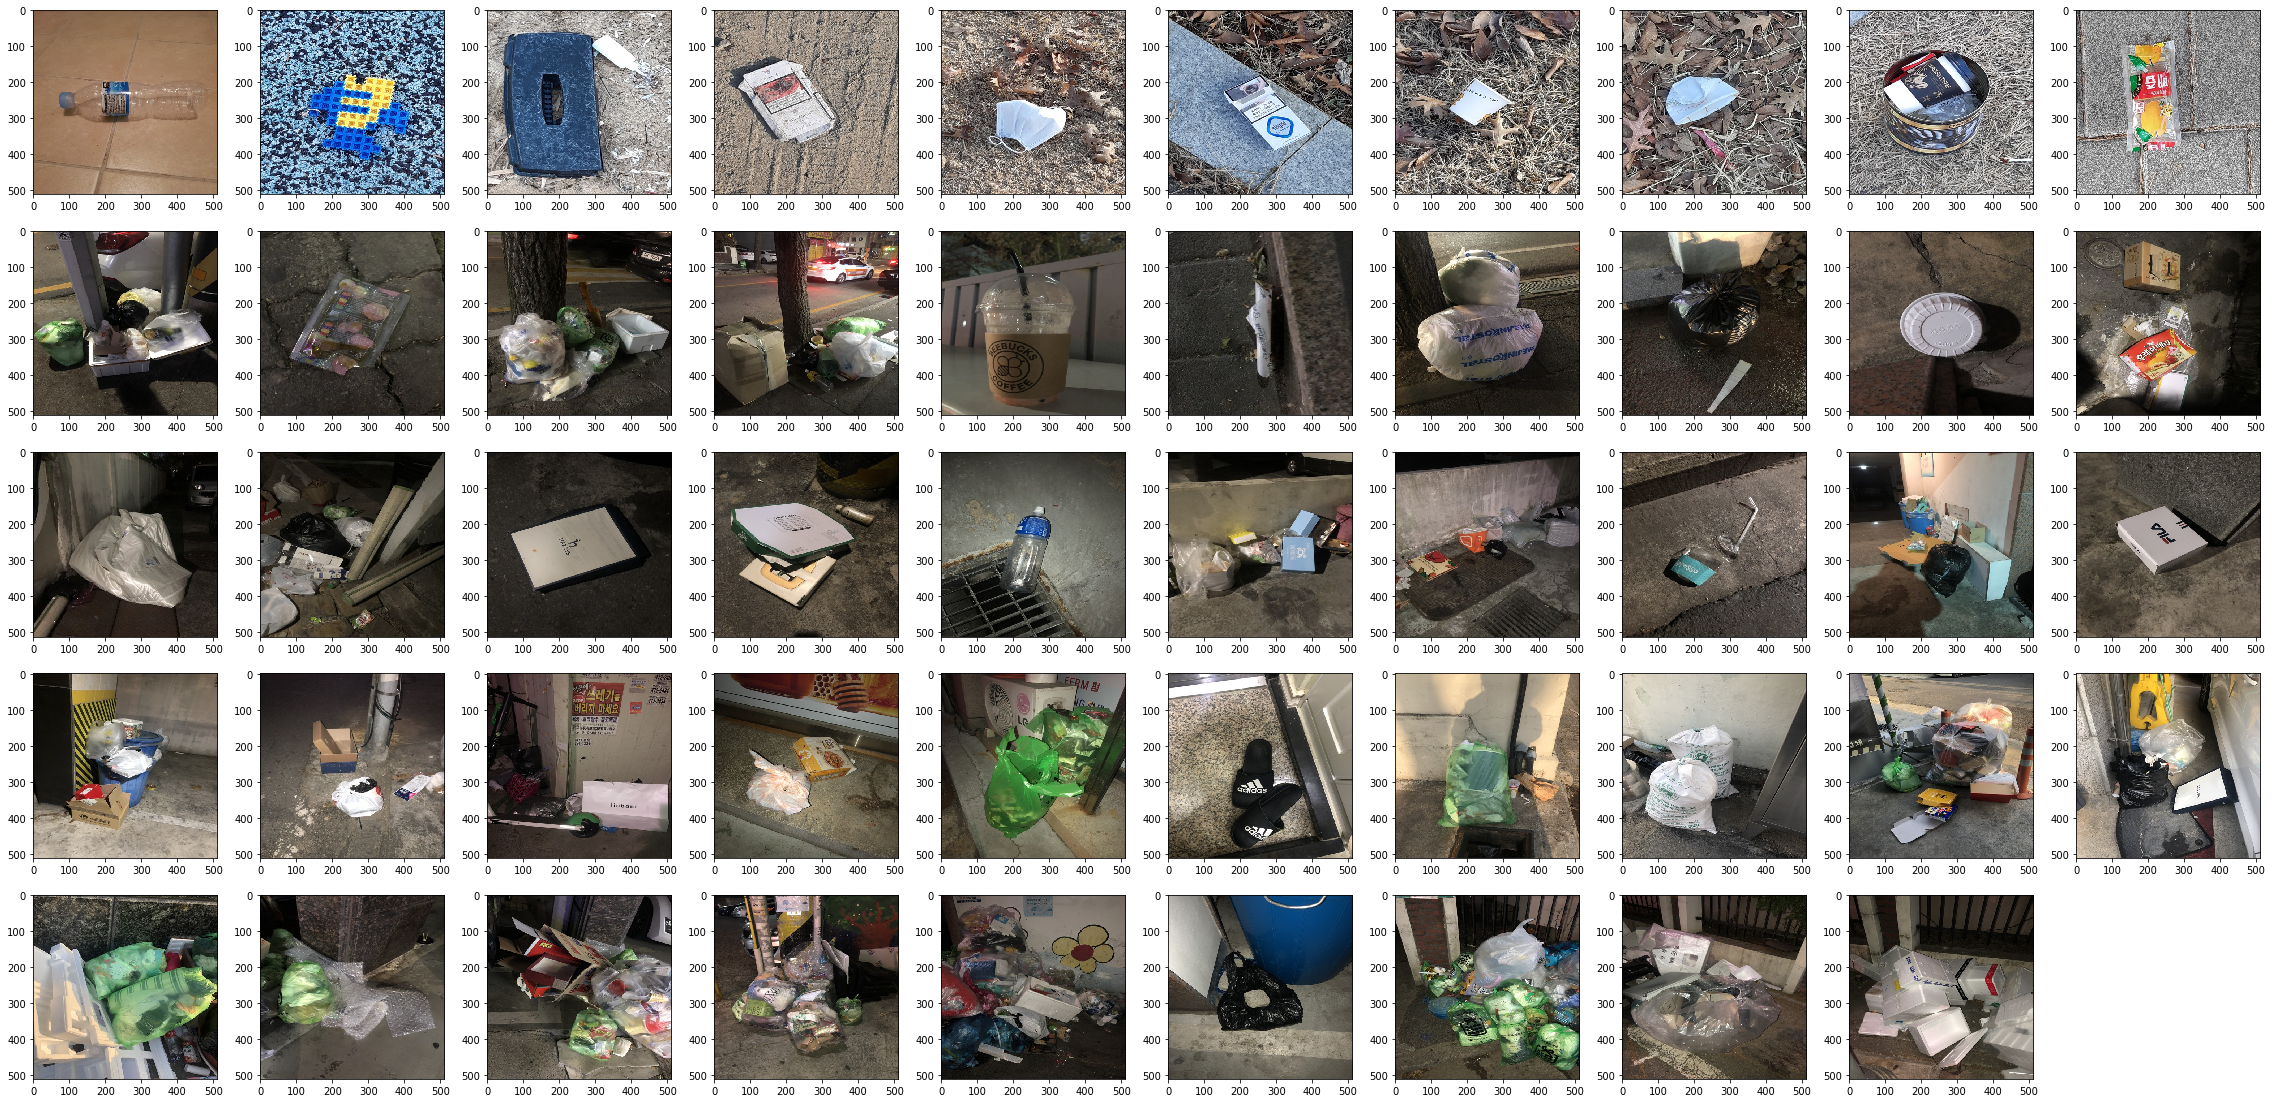

In [81]:
fig = plt.figure(figsize=(40,40))
for i in range(1,50):
    fig.add_subplot(10,10,i)
    image_id = coco.getImgIds(imgIds=i)
    image_infos = coco.loadImgs(image_id)[0]
    images = cv2.imread(os.path.join(dataset_path, image_infos['file_name']))
    images = cv2.cvtColor(images, cv2.COLOR_BGR2RGB).astype(np.float32)
    images /= 255.0   
    plt.imshow(images)    
    

In [22]:
def get_classname(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"

In [177]:
len(anns)

60

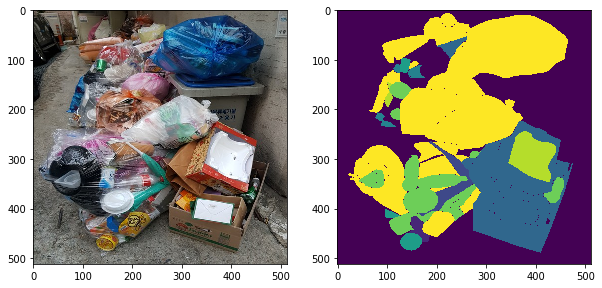

In [179]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.imshow(images)
ax2.imshow(masks)
    

In [180]:
image_infos

{'license': 0,
 'url': None,
 'file_name': 'batch_02_vt/1338.jpg',
 'height': 512,
 'width': 512,
 'date_captured': None,
 'id': 1986}